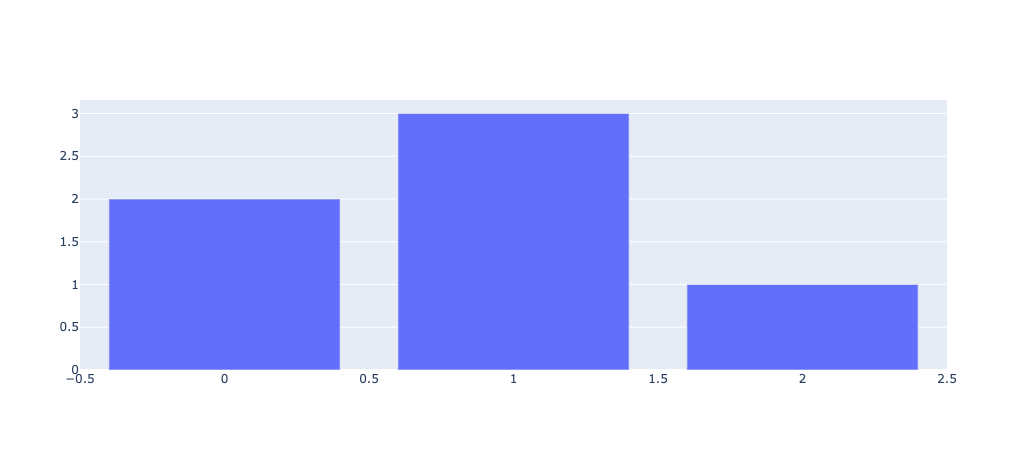

In [2]:
import plotly as py
import plotly.graph_objects as go
py.offline.init_notebook_mode(connected=True) 
fig = go.FigureWidget(data=go.Bar(y=[2, 3, 1]))
py.offline.iplot(fig)
# fig.show()
# fig.show()
# layout = dict(title = title,
#               xaxis = dict(title = x_var), #, range=['2017-09-01','2017-02-01']
#               yaxis = dict(title = title),
#               autosize=False,
#               width=(900 if len(config)==0 else 600),
#               height=(450 if len(config)==0 else 300),
#               showlegend=True
#              )
# fig = dict(data=data, layout=layout)
# py.offline.iplot(fig, config=config)

In [3]:
import plotly.graph_objects as go
fig = go.FigureWidget(data=go.Bar(y=[2, 3, 1]))
fig

FigureWidget({
    'data': [{'type': 'bar', 'uid': 'ae8b4c4f-7319-4567-802b-c2492af5cd44', 'y': [2, 3, 1]}],
 …

In [ ]:

def get_plot(dflist, varlist, labellist=None,  ## Old
              title=None, config={}, x_var='order_date', mode='lines'):
    """ 
    How to use:
        kwargs={'dflist':[df_1, df_2]  ## List of dataframes 
                ,'varlist':['var1', 'var2'] ## Variables to be plotted
                ,'title':'var1 & var2 for df_1 and df_2'  ## Plot title
                ,'labellist':['df_1_var_1', 'df_1_var_2, 'df_2_var_1, 'df_2_var_2'] ## Labels to be shown in legend
                } ## x_var set to order_date by default
        fig = get_plot(**kwargs)
    1. Creates dataframe x variable combination
    2. For each data trace, creates scatter-line plot
    3. Plots and returns fig object for interactive plot edit
    
    To edit on chart editor: 
    import plotly.io as pio
    pio.write_json(fig, 'chart_1.json') Right click on json file, open with plotly chart editor. 
    """

    ## Create dataframe x var combinations (plot all variables for each dataframe)
    dfvarlist=itertools.product(*[dflist,varlist])

    ## Get list of labels
    if labellist==None:
        labellist=varlist
        
    ## For every dataframe x variable, create a data trace for plotting
    data=[]    
    for dfvar,name in zip(dfvarlist, labellist):
        dfplt,var=dfvar[0], dfvar[1]
        if x_var=='order_date':
            try:
                dfplt.reset_index(inplace=True)
            except:
                pass
            dfplt.set_index(pd.DatetimeIndex(dfplt['order_date']), inplace=True)
        data = data + [go.Scatter(x=dfplt[x_var], y=dfplt[var], mode=mode, name=name)]  

    ## Initiate offline plot and create plot
    py.offline.init_notebook_mode(connected=True) 
    layout = dict(title = title,
                  xaxis = dict(title = x_var), #, range=['2017-09-01','2017-02-01']
                  yaxis = dict(title = title),
                  autosize=False,
                  width=(900 if len(config)==0 else 600),
                  height=(450 if len(config)==0 else 300),
                  showlegend=True
                 )
    fig = dict(data=data, layout=layout)
    py.offline.iplot(fig, config=config)
    return fig